## Identifying Opportunities to Reduce Car Crashes in Chicago

### Book 3:  Data Modeling - Classification

### Objective

Now that we know what are causing the most accidents in Chicago, we will create a ML classifier to categorize accidents into four main categories;

1. Injury & Damages over 1,500 dollars

2. Injury & Damages under 1,500 dollars 

3. No Injury & Damages over 1,500 dollars

4. No Injury & Damages under 1,500 dollars

The purpose of the classifier is to make predictions on, if an accident will lead to an injury and/or damages over a certain value. Furthermore, we will use this to identify each of the individual characterstics that lead to accidents in either of the four categories. 

### Results

### Data Modeling

In [1]:
# Import relevant packages

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, auc, roc_curve, roc_auc_score, \
mean_squared_error, confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.feature_selection import SelectFromModel 
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the dataset

df_model = pd.read_csv(r'Datasets/model_dataset.csv')

In [3]:
# Check the summary of the dataset

df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687278 entries, 0 to 687277
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   MANEUVER                 687278 non-null  object 
 1   SEX                      687278 non-null  object 
 2   AGE                      687278 non-null  int64  
 3   DRIVER_VISION            687278 non-null  object 
 4   PHYSICAL_CONDITION       687278 non-null  object 
 5   POSTED_SPEED_LIMIT       687278 non-null  int64  
 6   TRAFFIC_CONTROL_DEVICE   687278 non-null  object 
 7   DEVICE_CONDITION         687278 non-null  object 
 8   WEATHER_CONDITION        687278 non-null  object 
 9   LIGHTING_CONDITION       687278 non-null  object 
 10  FIRST_CRASH_TYPE         687278 non-null  object 
 11  TRAFFICWAY_TYPE          687278 non-null  object 
 12  ALIGNMENT                687278 non-null  object 
 13  ROADWAY_SURFACE_COND     687278 non-null  object 
 14  ROAD

AGE and POSTED_SPEED_LIMIT are showing as integers. We want each of these varibles to have their own class so that we can assign importance to each of their unique values. We will change these into strings.

In [4]:
# Change the AGE values to string

df_model.AGE = df_model.AGE.map(lambda x : str(x))
df_model.POSTED_SPEED_LIMIT = df_model.POSTED_SPEED_LIMIT.map(lambda x: str(x))

In [5]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687278 entries, 0 to 687277
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   MANEUVER                 687278 non-null  object 
 1   SEX                      687278 non-null  object 
 2   AGE                      687278 non-null  object 
 3   DRIVER_VISION            687278 non-null  object 
 4   PHYSICAL_CONDITION       687278 non-null  object 
 5   POSTED_SPEED_LIMIT       687278 non-null  object 
 6   TRAFFIC_CONTROL_DEVICE   687278 non-null  object 
 7   DEVICE_CONDITION         687278 non-null  object 
 8   WEATHER_CONDITION        687278 non-null  object 
 9   LIGHTING_CONDITION       687278 non-null  object 
 10  FIRST_CRASH_TYPE         687278 non-null  object 
 11  TRAFFICWAY_TYPE          687278 non-null  object 
 12  ALIGNMENT                687278 non-null  object 
 13  ROADWAY_SURFACE_COND     687278 non-null  object 
 14  ROAD

We will also change the target variables into binary numbers so that we can model this easily.

In [ ]:
"""
df_model.TARGET = df_model.TARGET.map(lambda x: 1 if x == 'NO INJURY & DAMAGE UNDER $1,500' else x)
df_model.TARGET = df_model.TARGET.map(lambda x: 2 if x == 'NO INJURY & DAMAGE OVER $1,500' else x)
df_model.TARGET = df_model.TARGET.map(lambda x: 3 if x == 'INJURY & DAMAGE UNDER $1,500' else x)
df_model.TARGET = df_model.TARGET.map(lambda x: 4 if x == 'INJURY & DAMAGE OVER $1,500' else x)
"""

In [6]:
# Declare X and y variables

X = df_model.drop(['DAMAGE', 'CRASH_TYPE', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 
                   'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'TARGET'], axis=1).copy()
y = df_model.TARGET

To process categorical variables, we need to encode them into dummy variables. One easy way to do so is by using get_dummies method.

In [9]:
# Convert predictors into dummies

X = pd.get_dummies(X, drop_first=True)

In [10]:
# Check the count of the transformed dataset

X.shape

(687278, 242)

We now have 242 total columns after transforming catergorical variables into dummies.

### Train-Test Split

In [11]:
# Split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

### Scale the Data

Since we have columns with different number of classes and variables, we need to transform them into a standard scale.

In [12]:
#Instantiate Standard Scaler
scaler = StandardScaler()

# Fit and transform train and test set
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Feature Importance Using Random Forest

Not all 242 features might be significant to our target variable. Just like p-values in linear regression, we can check the feature importance for each variable and select only the ones that are relevant to our model.

In [13]:
# Instantiate and fit the model

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train_scaled, y_train)  

RandomForestClassifier()

An easy way to check feature importance is by plotting them in a bar graph.

In [14]:
# Create a dataframe to include feature label and feature importances

df_feature = pd.DataFrame()

df_feature['labels'] = X.columns
df_feature['scores'] = rfc.feature_importances_

In [15]:
# Sort values to provide a sorted bar chart

df_feature.sort_values(by='scores', inplace=True)

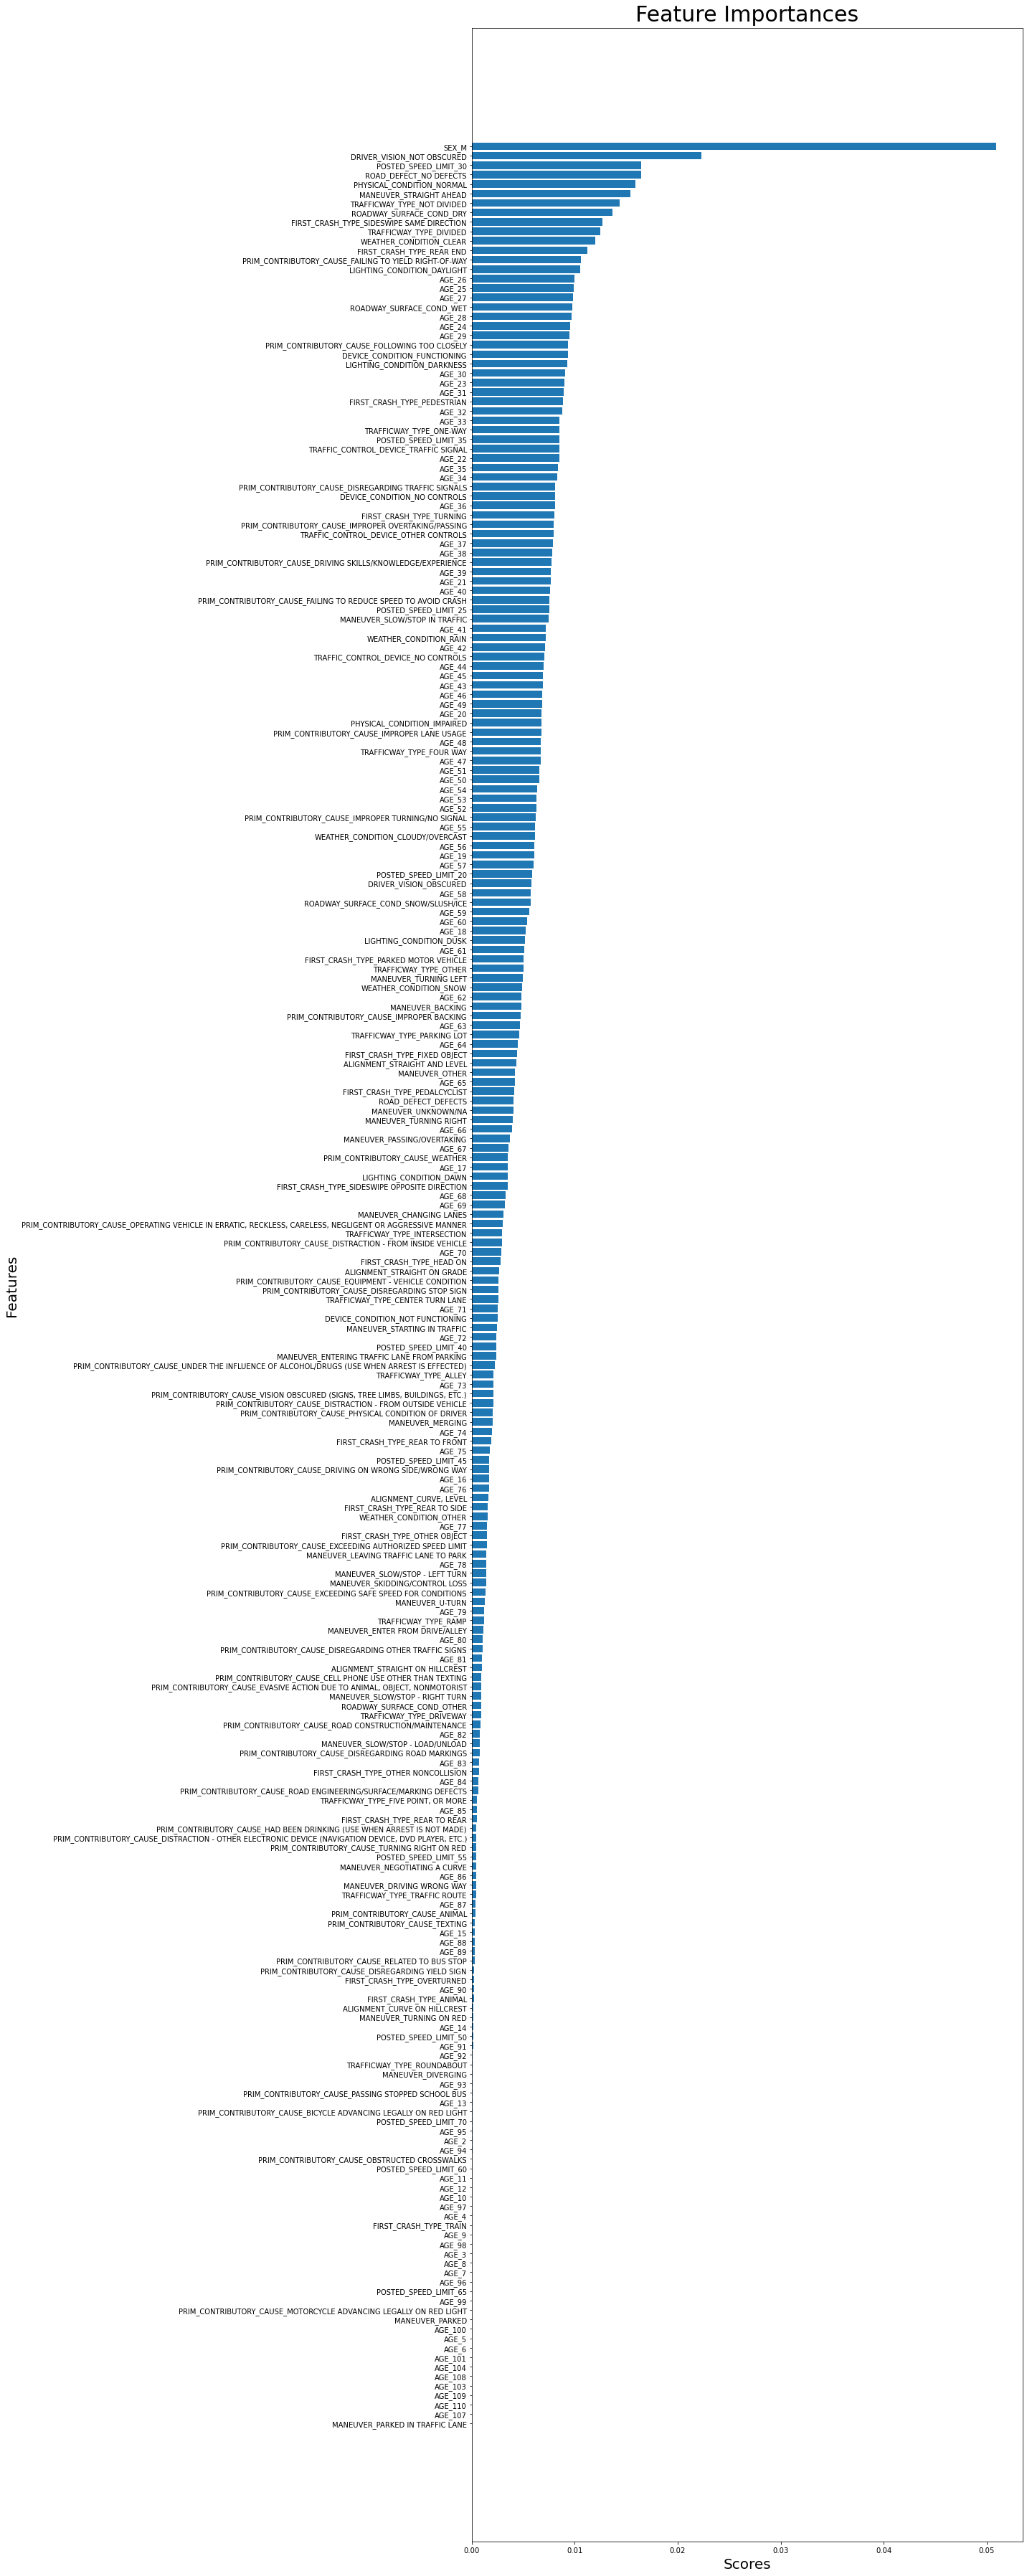

In [16]:
# Plot feature importances

plt.figure(figsize=(20,50))
plt.barh(df_feature.labels, df_feature.scores, align='center') 

plt.title('Feature Importances', fontsize=30, pad=10)
plt.xlabel('Scores', fontsize=20, labelpad=5)
plt.ylabel('Features', fontsize=20)

plt.tight_layout()
plt.savefig(r'Images/Feat_Imp_Main.png', bbox_inches='tight')

We can use the feature importance mean to act as a cut-off point to separate imporantant vs non-important features.

In [17]:
# Create a list of feature names that have importance greater than the feature mean

selected_features = X_train.columns[rfc.feature_importances_ > rfc.feature_importances_.mean()]

In [18]:
len(selected_features)

100

Out of 242 predictors, 100 of them have scores more than the feature mean.

Let's plot this in a bar chart as well. In order to do this, we will create a dataframe and plot it accordingly.

In [19]:
# Create a list of scores for all features

scores = rfc.feature_importances_

In [20]:
# Create a list of feature scores that have importance greater than feature mean

selected_features_scores = scores[rfc.feature_importances_ > rfc.feature_importances_.mean()]

In [21]:
# Create a dataframe for selected features and scores

df_selected_features = pd.DataFrame()

df_selected_features['labels'] = selected_features
df_selected_features['scores'] = selected_features_scores

In [22]:
df_selected_features.head()

,labels,scores
0,MANEUVER_BACKING,0.004824
1,MANEUVER_OTHER,0.004189
2,MANEUVER_SLOW/STOP IN TRAFFIC,0.007444
3,MANEUVER_STRAIGHT AHEAD,0.015431
4,MANEUVER_TURNING LEFT,0.004916


In [23]:
# Sort the values so we can visualize the results in order

df_selected_features.sort_values(by='scores', inplace=True)

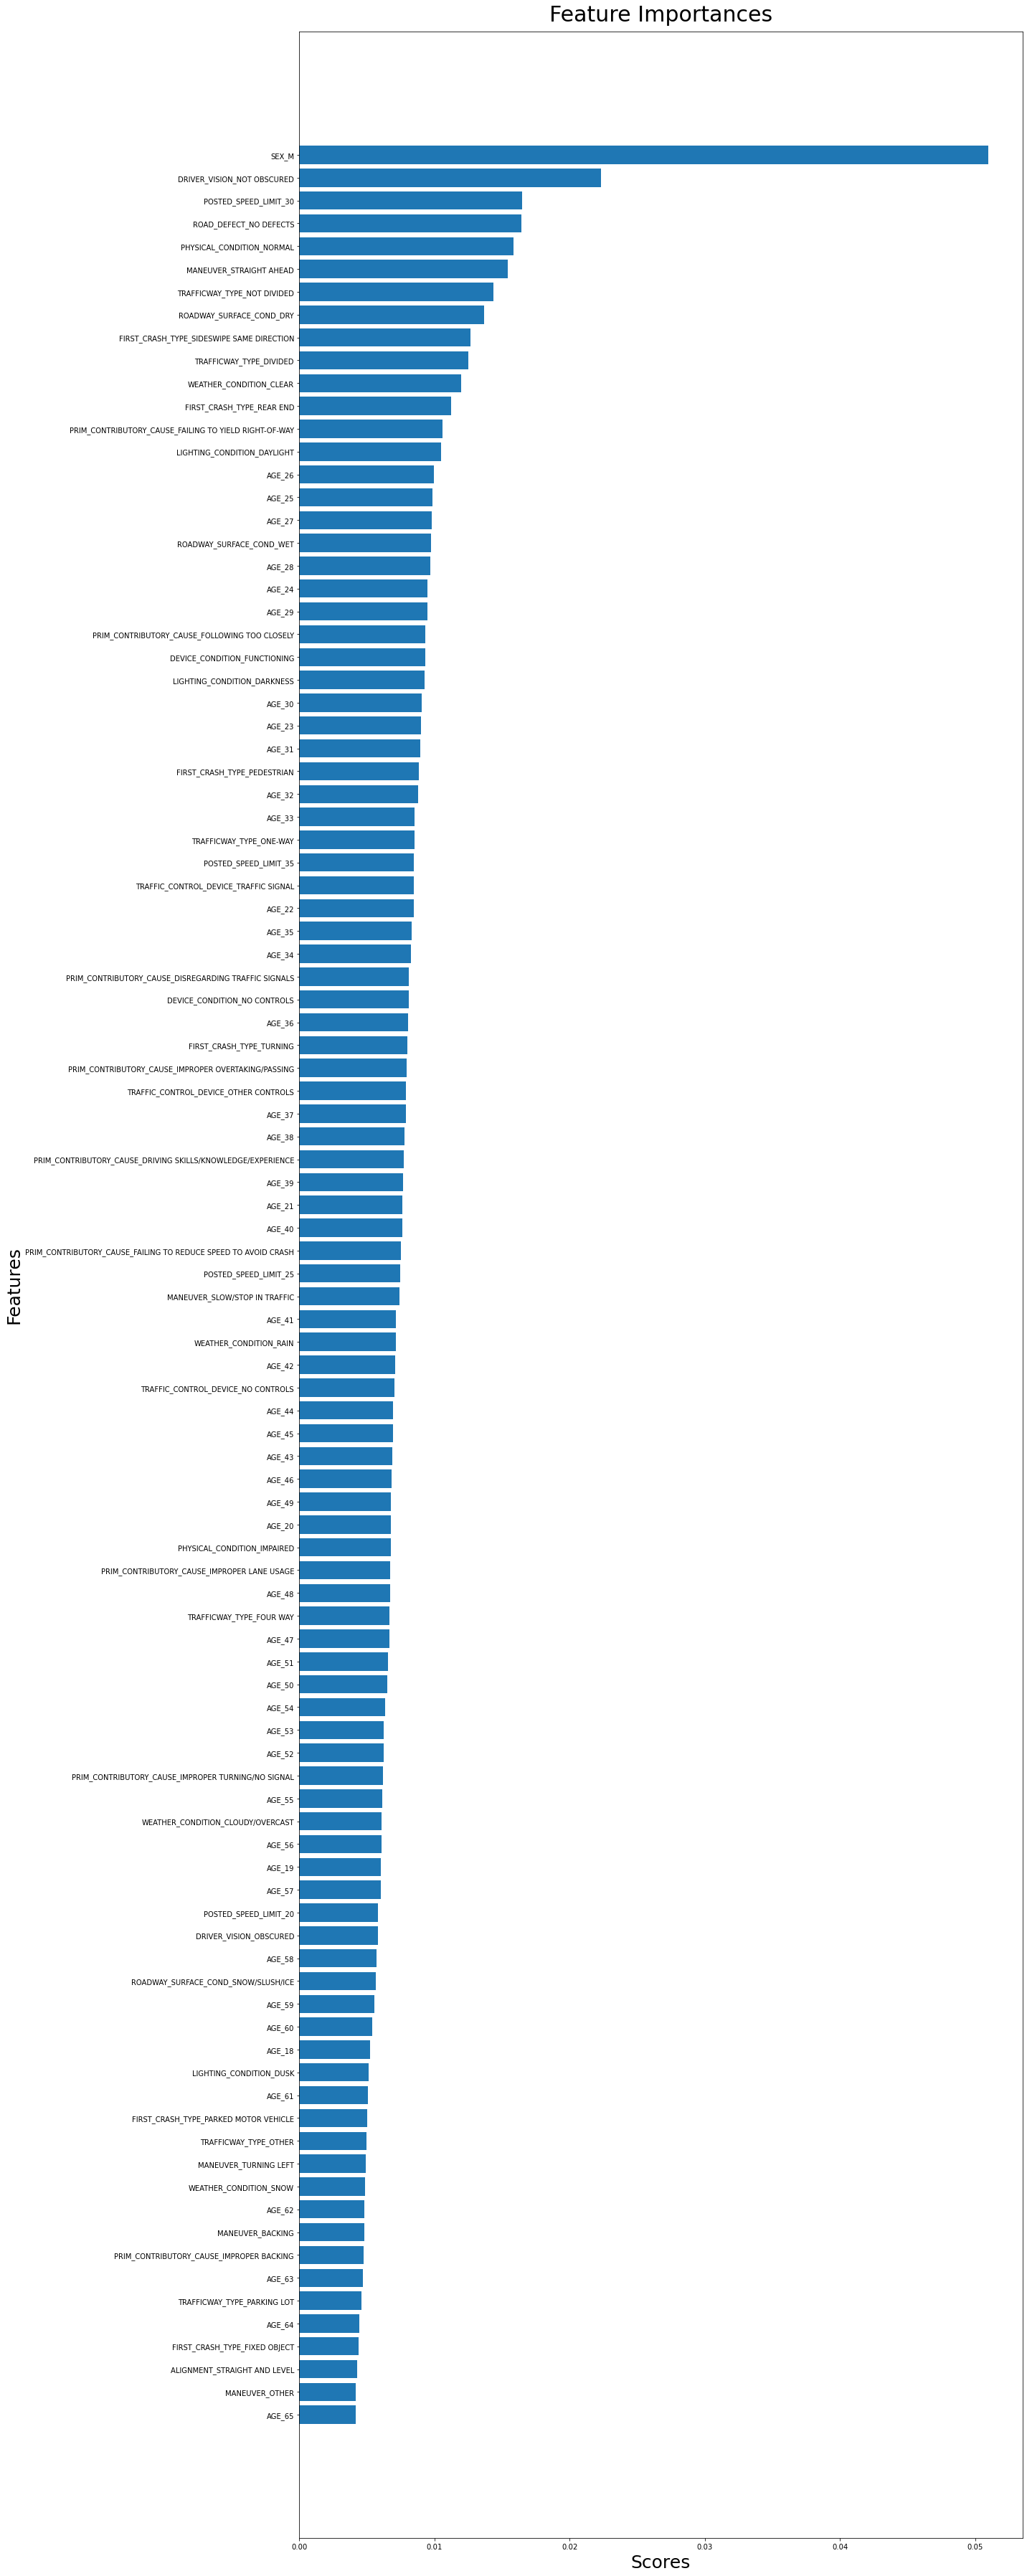

In [24]:
# Plot feature importances

plt.figure(figsize=(20,50))
plt.barh(df_selected_features.labels, df_selected_features.scores, align='center') 

plt.title('Feature Importances', fontsize=30, pad=15)
plt.xlabel('Scores', fontsize=25, labelpad=5)
plt.ylabel('Features', fontsize=25)

plt.tight_layout()
plt.savefig(r'Images/Feat_Imp_Selected.png', bbox_inches='tight');

Selecting features of importance that are higher than the mean gives us a better indication on what factors are pointing towards our target variable or in our case causing injuring with monetary damages. Looking at the above plot, we can make out some characterstics about the accidents.

- Most of the people involved in the accidents are Males. This also seems to be the biggest factor that influences an accident.
- Although, driver vision was not obscured and the roads had no defects, most of the accidents occured within speed limit of 30.
- The majority of first crash type was side swipe in the same direction. The traffic way being not divided ranks among the top, which proves the case for side swipe in the same direction being one of the highest.
- The second most crashes occured due to a rear-end collision.
- The highest primary contributory cause of an accident was failing to yield right of way, which again adds to the fact on why same direction side swipe saw the highest crash type.
- The age group involved in most of these accidents are between early twenties to mid thirties. Highest being 26. 
- Later on the list we can see roadway condition as wet, lighting condition as darkness and no device control slowly adding value to these accidents.

Based on the feature importances, we will only include features scoring more than the mean for our modeling.

In [25]:
X2 = pd.DataFrame(X, columns=selected_features)

### Train-Test Split

In [26]:
# Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=.3, random_state=125)

### Scale the Data

In [27]:
#Instantiate Standard Scaler
scaler = StandardScaler()

# Fit and transform train and test set
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
X_train_scaled.shape

(481094, 100)

We now have over 480k rows of data with 100 different predictors. This is still a lot and might create some problems while trying to fit into a model. One was of handling this is by using a dimensionality reduction technique. 

Principal Component Analysis (PCA) is one of the dimentionality reducing techniques that reduces the size of the data  while preserving the variablity in the data. Since we do not need to explore the dataset anymore, we can preprocess this into any numerical form necessary.

### Dimensionality Reduction

### Principal Component Analysis

By choosing .95 as n_components in PCA, we can capture 95% of the variability present in the data while reducing the dimensions.

In [30]:
#Instantiate PCA with 95% exlained variance
pca = PCA(.95)

In [31]:
X_train_transformed = pca.fit_transform(X_train_scaled)
X_test_transformed = pca.transform(X_test_scaled)

In [32]:
X_train_transformed.shape

(481094, 82)

The PCA has reduced our predictor columns from 100 to 82.

### Base Model: Decision Tree Classifier

We will use the Decision Tree Classifier with tree depth 3 as our base model.

In [33]:
#Instantiate the model with max tree depth of 3

dtc = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [34]:
%%time
#Fit the model

dtc.fit(X_train_transformed, y_train)

CPU times: user 14.2 s, sys: 248 ms, total: 14.4 s
Wall time: 14.6 s


DecisionTreeClassifier(max_depth=3)

In [35]:
# Make predictions on train and test datasets

y_pred_train_dtc = dtc.predict(X_train_transformed)
y_pred_test_dtc = dtc.predict(X_test_transformed)

In [36]:
# Calculate the accuracy 

train_acc = accuracy_score(y_train,y_pred_train_dtc) * 100
test_acc = accuracy_score(y_test, y_pred_test_dtc) * 100

print('Train accuracy is :{0}'.format(train_acc))
print('Test accuracy is :{0}'.format(test_acc))

Train accuracy is :39.26488378570508
Test accuracy is :39.22758312963179


The similar values in train and test accuracy suggests that the model is a good fit.

We will also use the test accuracy of 39 as the benchmark for our future modeling.

### Confusion Matrix

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. Let's plot a confusion matrix to verify our results.

In [54]:
# Create and print a confusion matrix 

print('\nConfusion Matrix:')
pd.crosstab(y_test, y_pred_test_dtc, rownames=['Actual Class'], colnames=['Predicted Class'], margins=True)


Confusion Matrix:


Predicted Class,"INJURY & DAMAGE OVER $1,500","INJURY & DAMAGE UNDER $1,500","NO INJURY & DAMAGE OVER $1,500","NO INJURY & DAMAGE UNDER $1,500",All
Actual Class,,,,,
"INJURY & DAMAGE OVER $1,500",3204,460,45619,35,49318
"INJURY & DAMAGE UNDER $1,500",229,1172,7844,9,9254
"NO INJURY & DAMAGE OVER $1,500",913,26,76433,68,77440
"NO INJURY & DAMAGE UNDER $1,500",424,239,69437,72,70172
All,4770,1897,199333,184,206184


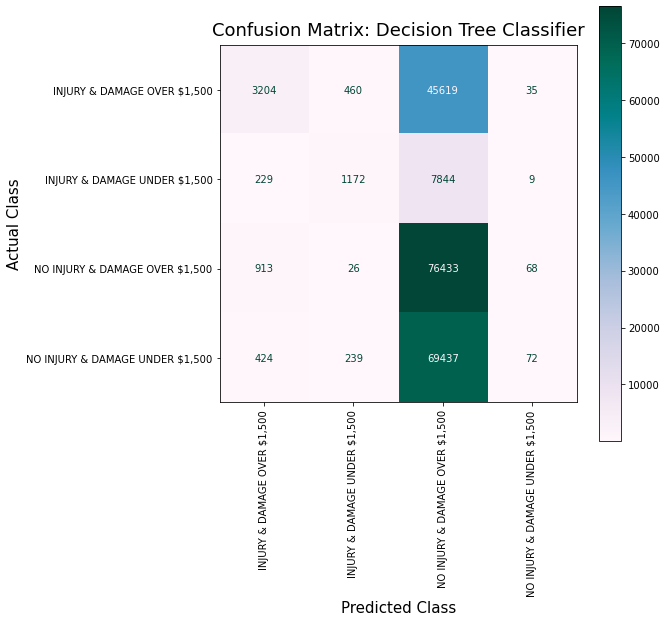

In [56]:
# Visualize confusion matrix

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(dtc, X_test_transformed, y_test,
                      cmap=plt.cm.PuBuGn, ax=ax)
ax.set_title('Confusion Matrix: Decision Tree Classifier', fontsize=18, pad=10)
ax.set_xlabel('Predicted Class', fontsize=15)
ax.set_ylabel('Actual Class', fontsize=15)

plt.xticks(rotation=90)
plt.grid(False)
plt.savefig(r'Images/DTC_confmatx.png', bbox_inches='tight')
plt.show();

The columns in the confusion matrix shows the predicted class while the rows show the actual class. We can further summarize the results as below:

- INJURY & DAMAGE OVER 1,500 - 3204 predicted correctly while 1556 were classified incorrectly.
- INJURY & DAMAGE UNDER 1,500 - 1172 predicted correctly while 725 were classified incorrectly.
- NO INJURY & DAMAGE OVER 1,500 - 76433 predicted correctly while 122900 were classified incorrectly.
- NO INJURY & DAMAGE UNDER 1,500 - 72 predicted correctly while 112 were classified incorrectly.

We can also measure the level of accuracies in this classification through a classification report.

### Classification Report

In [61]:
# Classification report
print('\nClassification Report')
print('----------------------')
print(classification_report(y_test, y_pred_test_dtc))


Classification Report
----------------------
                                 precision    recall  f1-score   support

    INJURY & DAMAGE OVER $1,500       0.67      0.06      0.12     49318
   INJURY & DAMAGE UNDER $1,500       0.62      0.13      0.21      9254
 NO INJURY & DAMAGE OVER $1,500       0.38      0.99      0.55     77440
NO INJURY & DAMAGE UNDER $1,500       0.39      0.00      0.00     70172

                       accuracy                           0.39    206184
                      macro avg       0.52      0.29      0.22    206184
                   weighted avg       0.47      0.39      0.25    206184



The report shows an overall accuracy of 39%, which matches our previous results.

* **Precision** gives us the number of times the model was able to correctly classify each category without the penalty of it being incorrect.


* **Recall** gives us the exact percentage of each category that the model was able to capture.


* **F1-Score** is the harmonic mean between Precision and Recall. It is a better measure for model accuracy since it incorporates both precision and recall scores.

The overall precision, recall and f1-scores are .52, .29, and .22 respectevely. Considering that fact that we might have class imbalances, accruacy is always not the best measure to evalaute model performance. F1-score in the other hand is one of the most reliable score to measure model performance. The overall f1-score of 22% is quite low, but we will use this as a benchmark and test different criterias or classifiers to see which one gives us the best results.

### Re-grow the Tree Using Entropy

In [48]:
%%time
#Instantiate the model
dtc1 = DecisionTreeClassifier(criterion='entropy')

#Fit the model
dtc1.fit(X_train_transformed, y_train)

# Make predictions for train and test data
y_pred_train_dtc1 = dtc1.predict(X_train_transformed)
y_pred_test_dtc1 = dtc1.predict(X_test_transformed)

# Calculate accuracy 
train_acc1 = accuracy_score(y_train,y_pred_train_dtc1) * 100
test_acc1 = accuracy_score(y_test, y_pred_test_dtc1) * 100
print('Train accuracy is :{0}'.format(train_acc1))
print('Test accuracy is :{0}'.format(test_acc1))

Train accuracy is :85.75330392813046
Test accuracy is :39.25086330656113
CPU times: user 1min 59s, sys: 580 ms, total: 1min 59s
Wall time: 1min 59s


The infomarmation gain criterion 'entropy' does not seem to have made much of a difference. Although it trained well in the training data with over 85% accuracy, it was not able to generalize and predict the test set well. This means that the model has started to overfit.

In [67]:
# Classification report

print('\nClassification Report')
print('----------------------')
print(classification_report(y_test, y_pred_test_dtc1))


Classification Report
----------------------
                                 precision    recall  f1-score   support

    INJURY & DAMAGE OVER $1,500       0.39      0.41      0.40     49318
   INJURY & DAMAGE UNDER $1,500       0.15      0.14      0.14      9254
 NO INJURY & DAMAGE OVER $1,500       0.41      0.43      0.42     77440
NO INJURY & DAMAGE UNDER $1,500       0.41      0.37      0.39     70172

                       accuracy                           0.39    206184
                      macro avg       0.34      0.34      0.34    206184
                   weighted avg       0.39      0.39      0.39    206184



Looking at the classification report, our f1-score has gone up by 11%. Using 'entropy' as the crieria of classification seems to have made our model better.

Since, we will be calculating the accuracy score and plotting the matrix multiple times, let's create a function to use it on different models.

In [68]:
def pred_score(clf):    
    # Make predictions on train and test data
    y_pred_train = clf.predict(X_train_transformed)
    y_pred_test = clf.predict(X_test_transformed)
    
    # Calculate accuracy 
    train_acc = accuracy_score(y_train,y_pred_train) * 100
    test_acc = accuracy_score(y_test, y_pred_test) * 100
    print('Train accuracy is :{0}'.format(train_acc))
    print('Test accuracy is :{0}'.format(test_acc))
    
    # Create and print a confusion matrix 
    print('\nConfusion Matrix')
    print('-----------------')
    print(pd.crosstab(y_test, y_pred_test, rownames=['True'], colnames=['Predicted'], margins=True))

    # Classification report
    print('\nClassification Report')
    print('----------------------')
    print(classification_report(y_test, y_pred_test))

### Model 1: KNN

In [69]:
# Instantiate and fit the model
knn = KNeighborsClassifier()
knn.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [ ]:
pred_score(knn)

The KNN seems to be just a little better than our base mode at 65% accuracy and AUC score of 0.63.

### Model 2: Random Forest

In [ ]:
# Instantiate and fit the model
rf = RandomForestClassifier(n_estimators=100, max_depth= 5)
rf.fi(X_train_transformed, y_train)  

In [ ]:
%%time
pred_score(rf)

Looking at the train and test accuracy, the random forest model also shows a good fit of the data. The AUC is 0.62. The difference in f1-scores suggests that there is some bias in the data between the two classifiers.

### Feature Importance with Random Forest

In [ ]:
n_features = X_train_transformed.shape[1]
plt.figure(figsize=(20,50))
plt.barh(range(n_features), rf.feature_importances_, align='center') 
plt.yticks(np.arange(n_features))
plt.title('Feature Imporance', fontsize=30, pad=5)
plt.xlabel('Feature importance', fontsize=20, labelpad=5)
plt.ylabel('Features', fontsize=20)
plt.tight_layout()
plt.savefig(r'Graphs\feat_imp.png', bbox_inches='tight')

The feature importance gives us the distribution of how each feature is affecting the model. We can use then use this information to filter different predictors.

### Selecting best features

In [ ]:
# Print the gini importance of each feature
for feature in zip(range(n_features), rf.feature_importances_):
    print(feature)

Let's plot the scores to visualize the scores.

In [ ]:
# Box plot
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=rf.feature_importances_)
plt.savefig(r'Graphs\box_plot.png', bbox_inches='tight');

Majority of the predictors seem to have feature importance of less than 0.01.

In [ ]:
rf.feature_importances_.max()

In [ ]:
rf.feature_importances_.min()

Let's plot this on a normal distribution to see if we can extract more information.

In [ ]:
# Check the normal distribution of feature scores
from scipy.stats import norm
import statistics
  
# Plot between -0.05 and 0.2 with .001 steps.
x_axis = np.arange(-0.05,0.2,.001)
  
# Calculate mean and standard deviation
mean = statistics.mean(rf.feature_importances_)
sd = statistics.stdev(rf.feature_importances_)
  
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.title('Feature Importance Normal Distribution')
plt.ylabel('No. of Features')
plt.xlabel('Feature Importance')
plt.savefig(r'Graphs\norm_dist.png', bbox_inches='tight')
plt.show();

Here again, you can see that most of the features are centered between 0.00 and 0.025. The number of features fall sharply as the feature importance increases.

We will use a threshold of 0.01 to try and capture most of the predictors. 

In [ ]:
thresh_1 = [x for x in rf.feature_importances_ if x > 0.01]
len(thresh_1)

Using a threshold of 0.01, we have 22 predictors to use in our model.

We will use the SelectFromModel to apply the 0.01 threshold and run the model. 

In [ ]:
# Instantiate and fit the model
sfm = SelectFromModel(rf, threshold=0.01)

sfm.fit(X_train_transformed, y_train)

In [ ]:
# Transform the data to create a new dataset containing only the most important features
X_best_train = sfm.transform(X_train_transformed)
X_best_test = sfm.transform(X_test_transformed)

In [ ]:
# Instantiate and fit the model
rf_best = RandomForestClassifier(n_estimators=100, max_depth= 5)
rf_best.fit(X_best_train, y_train)

We will update our pred_score function to include the selected features train and test data.

In [ ]:
# Define function for X_best datasets

def pred_score_best(clf):    
    # Make predictions on train and test data
    y_pred_train = clf.predict(X_best_train)
    y_pred_test = clf.predict(X_best_test)
    
    # Calculate accuracy 
    train_acc = accuracy_score(y_train,y_pred_train) * 100
    test_acc = accuracy_score(y_test, y_pred_test) * 100
    print('Train accuracy is :{0}'.format(train_acc))
    print('Test accuracy is :{0}'.format(test_acc))
    
    # Create and print a confusion matrix 
    print('\nConfusion Matrix')
    print('-----------------')
    print(pd.crosstab(y_test, y_pred_test, rownames=['Actual'], colnames=['Predicted'], margins=True))

    # Classification report
    print('\nClassification Report')
    print('----------------------')
    print(classification_report(y_test, y_pred_test))

In [ ]:
# Evaluate the model
&&time
pred_score_best(rf_best)

Here, you can see a great fit with almost identical train and test accuracy scores. The AUC is also 0.64, which means that we are able to predict the target variables with similar success rate but with less features. The run time for the model has also decreased considerably. We will use these selected features going forward.

### Model 3: XG Boost

In [ ]:
# Instantiate and fit the model
xg = xgb.XGBClassifier()
xg.fit(X_best_train, y_train)

In [ ]:
# Evaluate the model
pred_score_best(xg)

The accuracy scores are up to 72% and 70% for train vs test. The model seems to be a good fit. The AUC has also increased to 0.68. This has been our best scores so far. We will use this model and tune for better performance.

### Tuning XGBoost with GridSearchCV

We can use GridSearchCV to run the model with different iterations and come up with the parameters that gives us the best results.

First we will create a grid for the algorithm to loop through.

In [ ]:
param_grid = {
    "learning_rate": [0.1],
    'max_depth': [6,12],
    'min_child_weight': [5,10],
    'subsample': [0.7,1.4],
    'n_estimators': [5, 30, 100, 250],
}

In [ ]:
# Instantiate and fit the model
grid_clf = GridSearchCV(xg, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_best_train, y_train)

In [ ]:
# Print the best parameters
best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

In [ ]:
# Evaluate the model
pred_score_best(grid_clf)

Using the tuned paramenters, the model shows slightly increase in overall model performance. The rest of metrics are almost identical to the regular XGBoost model. We might have reached the highest level of precision with this transformed dataset. We will keep this as our final model.

Finally, the model is a good fit as the test accuracy is slightly lower than the train accuracy at 70.5%. The AUC score is 0.68 with f1-score of 0.61 an 0.76 for target variables 0 and 1 respectively.

In [ ]:
# Visualize confusion matric
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(grid_clf, X_best_test, y_test,
                      cmap=plt.cm.PuBuGn, ax=ax)
ax.set_title('Confusion Matrix: XGBoost Tuned', fontsize=18, pad=10)
ax.set_xlabel('Predicted Labels', fontsize=15)
ax.set_ylabel('True Labels', fontsize=15)

plt.grid(False)
plt.savefig(r'Graphs\xbg_confmatx.png', bbox_inches='tight')
plt.show();

### Conclusion

We can conclude our final ML classifer to be the tuned XGBoost model. Looking at the results, we can derive the following conclusions:

* The model has an overall accuracy of 71% and an AUC of 0.68.


* **Precision** gives us the number of times the model was able to correctly classify each category without the penalty of it being incorrect. Both 'Unintenational' and 'Intentional' catergories were classified about 70% of the time correctly.


* **Recall** gives us the exact percentage of each category that the model was able to capture. For '0' or 'Unintentional', the model was only able to only categorize 54% of those present in our data. While for '1' or 'Intenational', the model was able to categorize about 76% of those present in our data. 


* **F1-Score** is the harmonic mean between Precision and Recall. It is a better measure for model accuracy since it incorporates both precision and recall scores. In our final model, we have a f1-score of 0.61 and 0.76 for each of our categories respectively. We can use this as a final measure of our model's performance. From the difference, we can also infer that there might be some class imbalances between the two categories.